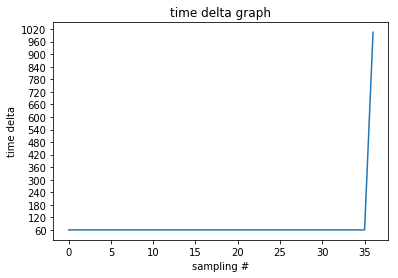

In [38]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
import pprint
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

from datetime import datetime, timedelta

import dateutil.parser



#---------------------------------------------------
xmajorLocator   = MultipleLocator(5) #将x主刻度标签设置为20的倍数
# xmajorFormatter = FormatStrFormatter('%5.1f') #设置x轴标签文本的格式
xminorLocator   = MultipleLocator(5.0) #将x轴次刻度标签设置为5的倍数


ymajorLocator   = MultipleLocator(60) #将y轴主刻度标签设置为10的倍数
ymajorFormatter = FormatStrFormatter('%1d') #设置y轴标签文本的格式
yminorLocator   = MultipleLocator(60) #将此y轴次刻度标签设置为60的倍数

filename = "C:\\Dev\\test_result.txt"

date_list = []

delta_list = []

with open(filename, 'r') as file: 
    lines = file.readlines()

    for line_num, line in enumerate(lines):
        
        #print(line)
        str_date = line.split(',')[1]
        #print(str_date)

        mydate = datetime.strptime(str_date.strip().rstrip('\n').replace("CST",""), '%a %b %d %H:%M:%S %Y')
        #mydate = dt.strptime(temp, '%a %b %d %H:%M:%S %Z %Y')
        #mydate = dateutil.parser.parse(str_date)
        #print(mydate)
        date_list.append(mydate)
    
    sorted_date = sorted(date_list)
    #print(sorted_date)
    
    for index in range(0, len(sorted_date)-1):
        delta = sorted_date[index + 1] - sorted_date[index]
        #print(delta.total_seconds())
        delta_list.append(delta.total_seconds())
    
    list_key = [n for n in range(0, len(delta_list))]
    
    fig = plt.figure()
    ax = plt.subplot(111)
    #设置主刻度标签的位置,标签文本的格式 
    ax.xaxis.set_major_locator(xmajorLocator) 

    ax.yaxis.set_major_locator(ymajorLocator) 

    ax.yaxis.set_major_formatter(ymajorFormatter)

    #ax.set_ylim(0, 1000)
    ax.plot(list_key, delta_list, label='sampling')

    plt.xlabel('sampling #')

    plt.ylabel('time delta')

    plt.title("time delta graph")
    
    plt.show()
    